# NAIVE Forecast

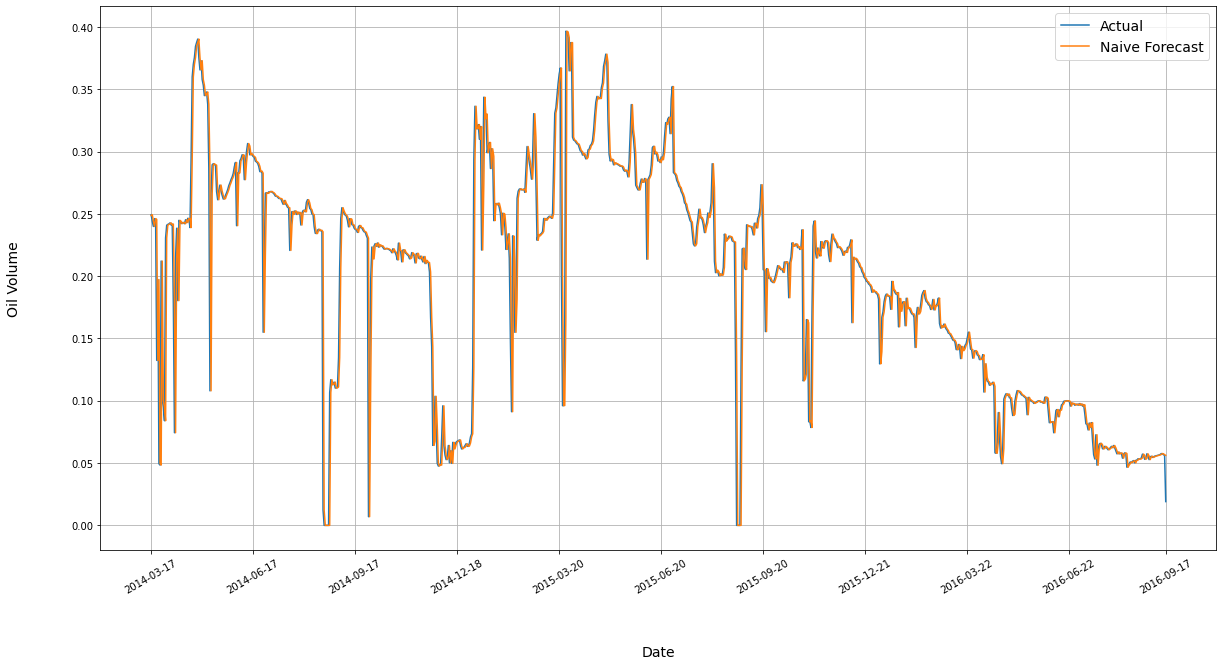

mae = 0.01122068857447045, 
mse = 0.0008306426000780922, 
rmse = 0.02882087091116596


In [ ]:
naive_oil_forecast = scaled_oil_data[split_date - 1:-1]

plt.figure(figsize=(20, 10))

plot_series(date_valid, oil_valid, ylabel="Oil", label="Actual")
plot_series(date_valid, naive_oil_forecast, ylabel="Oil", label="Naive Forecast")

plt.savefig(f'../plots/oil/oil_naive_forecast.png')
plt.show()

mae = keras.metrics.mean_absolute_error(oil_valid, naive_oil_forecast).numpy()
mse = keras.metrics.mean_squared_error(oil_valid, naive_oil_forecast).numpy()
rmse = math.sqrt(mse)

print(f'mae = {mae}, \nmse = {mse}, \nrmse = {rmse}')

# Moving Average

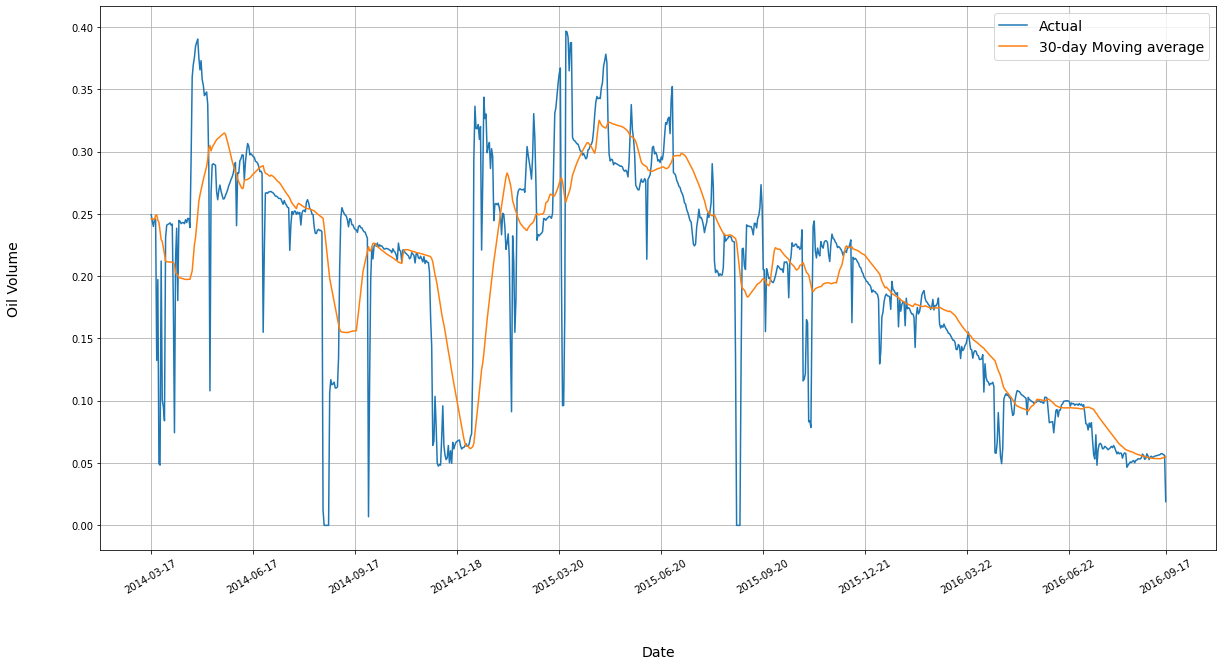

mae = 0.03273613551274349, 
mse = 0.002995516502085705, 
rmse = 0.054731311898087234


In [ ]:
# Moving Average

def moving_average_forecast(series, window_size):
    """Forecasts the mean of the last few values.
    If window_size=1, then this is equivalent to naive forecast"""
    
    mov = np.cumsum(series)
    mov[window_size:] = mov[window_size:] - mov[:-window_size]
    
    return mov[window_size - 1:-1] / window_size

oil_moving_avg = moving_average_forecast(scaled_oil_data, 30)[split_date - 30:]

plt.figure(figsize=(20, 10))

plot_series(date_valid, oil_valid, ylabel="Oil", label="Actual")
plot_series(date_valid, oil_moving_avg, ylabel="Oil", label="30-day Moving average")

plt.savefig(f'../plots/oil/oil_30d_mov_avg_forecast.png')
plt.show()

mae = keras.metrics.mean_absolute_error(oil_valid, oil_moving_avg).numpy()
mse = keras.metrics.mean_squared_error(oil_valid, oil_moving_avg).numpy()
rmse = math.sqrt(mse)

print(f'mae = {mae}, \nmse = {mse}, \nrmse = {rmse}')